<div style = "background-image: url('Images/Fire/pot_fire.png'); height: 400px;vertical-align: middle;">
    <p>
        <h1 style = "color: white; text-align: center; line-height: 100px; font-family: serif;"> <u>Forest Fire Prediction </u> </h1> 
        <h2 style = "color: white; text-align: center; font-family: serif;"> Micigan Technological University </h2> 
        <h2 style = "color: white; text-align: center; font-family: serif;">MA 5751 Fall 2020</h2>
        <h3 style = "color: white; text-align: center; font-family: serif;"> Michael Nicodemus </h3>
    </p>
</div>
<div style = "background-color: white; height: 50px; line-height: 50px;">
<b>Image Source: </b><a href = "https://www.bbc.com/news/in-pictures-40317711"> https://www.bbc.com/news/in-pictures-40317711 </a>
</div>


<div style = "background-color: white; height: 50px; line-height: 45px;">
    <b style = "font-family: Georgia, serif;">Data: </b><a href="https://archive.ics.uci.edu/ml/datasets/forest+fires">https://archive.ics.uci.edu/ml/datasets/forest+fires"</a>
    
</div>

<div style = "background-color: white; height: 50px; line-height: 50px;">
    <b style = "font-family: Georgia, serif;">Github: </b><a href="https://github.com/nicodemusmd/Forest_Fire">https://github.com/nicodemusmd/Forest_Fire</a>
    
</div>

<div style = "background-color: AliceBlue; font-family: 'Times New Roman', Times, serif; width: 500px; border: 3px solid black">
    <b style = "font-family: Georgia, serif;"><u>Summary of Study:</u></b>
    <ol>
        <li>Variable Selection
            <ul>
                <li>EDA</li>
                <li>Variable Selection (Stepwise & Penalized Likelihood)</li>
                <li>Shrinkage Methods</li>
                <li>Model Selection on (AIC/BIC & CV)</li>
            </ul>
        </li>
        <li>Classification (With Bootsrap)
            <ul>
                <li>Logistic Regression</li>
                <li>Naive Bayes</li>
                <li>SVM </li>
                <li>LDA/QDA</li>
            </ul>  
        </li>
        <li>Tree-based Methods
            <ul>
                <li>Random Forests</li>
                <li>Bagging/Boosting</li>
                <li>Ensemble Tree</li>
            </ul>
        </li>
        <li>Unsupervised Learning
            <ul>
                <li>PCA</li>
                <li>K Means</li>
                <li>Spectral !!</li>
            </ul>   
        </li>
        <li>Deep Learning (With Hyperameter Tuning)
            <ul>
                <li>Neural Networks</li>
                <li>GAMs</li>
                <li>MARS (kernal smoothing splines)</li>
            </ul>
        </li>
    </ol> 


</div>

In [56]:
#Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import random as rd
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# from pyearth import Earth

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Feature Selection
from sklearn.decomposition import PCA

####----------------------####
####--------Models--------####
from sklearn import linear_model
## NN
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

#Cluster
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import SpectralClustering

####----------------------####

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score as EV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


#Sampling
from sklearn.model_selection import train_test_split as TTS


#Custom Libraries
#from MyLibrary import Neural_Network_report as nnr
#from MyLibrary import RegressionReport as rep
from MyLibrary import predRespPlots as prt
from MyLibrary import fit_linear_reg as flr
from MyLibrary import feature_selection
from MyLibrary import plot_feature_selection_criterion

In [93]:
#Import data
file = "Data/forestfires.csv"
fire = pd.read_csv(file)

X = fire.drop(columns = "area")
y = fire.area
#Split the Data
#X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2, random_state = 5)

X_train.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
184,8,6,aug,fri,93.9,135.7,586.7,15.1,20.8,34,4.9,0.0
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0
478,7,4,jul,sun,93.7,101.3,423.4,14.7,18.2,82,4.5,0.0
382,8,6,aug,wed,95.2,217.7,690.0,18.0,28.2,29,1.8,0.0
71,4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0


## EDA

In [10]:
eda  = pd.concat([X_train, y_train], axis = 1)
eda.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
360,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09
221,3,4,sep,fri,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38


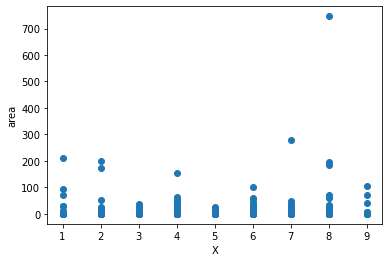

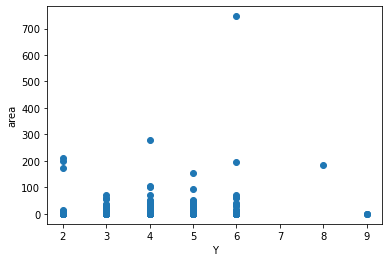

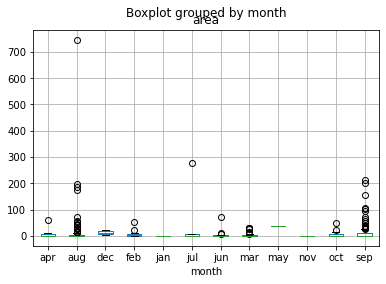

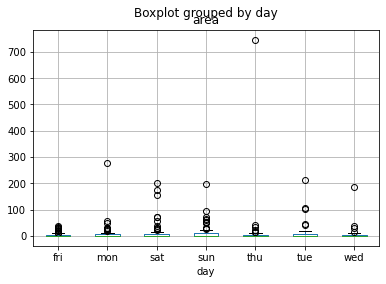

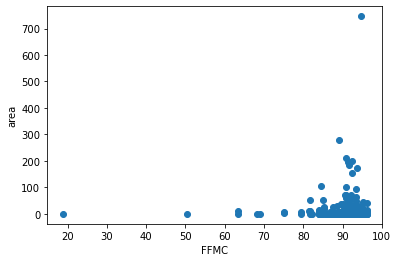

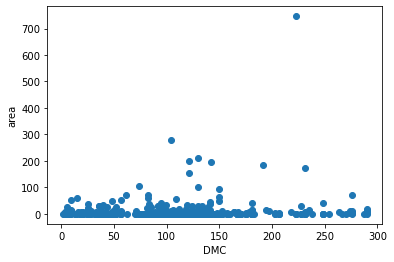

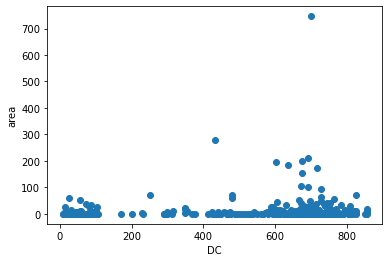

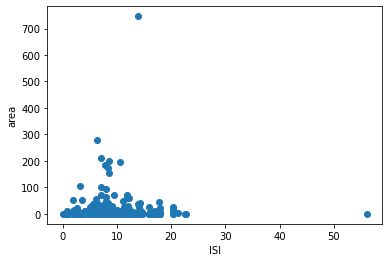

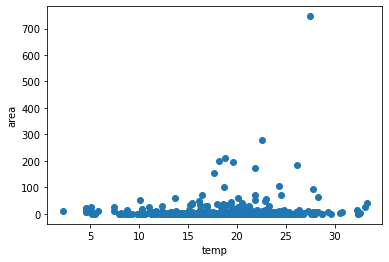

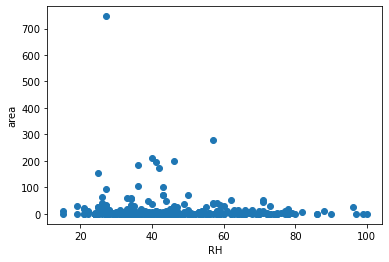

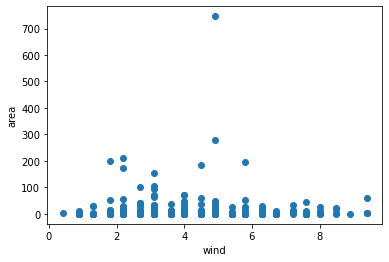

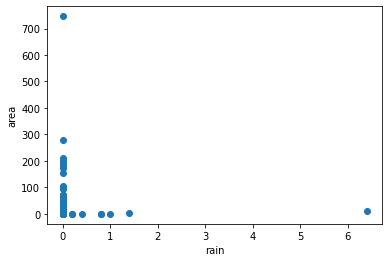

In [5]:
# custom function that will plot all predictors against response. This will save plots to Images/PredRespPlots unless 
# the save argument is removed/set to False.
prt(eda, "area", save = True, path = "Images/predRespPlots")

In [19]:
eda.shape

(413, 13)

In [21]:
o = list(set([(x,y) for (x,y) in zip(eda.X, eda.Y)]))

coor_burnt = {(i,j): [0,0] for (i,j) in o} ###[total_area_burnt, num_of_fires]

for k in eda.index:
    i = int(eda['X'][k])
    j = int(eda['Y'][k])
    coor_burnt[(i,j)][0] += eda['area'][k]
    coor_burnt[(i,j)][1] +=1
    

for m in coor_burnt.keys():
    a = round(coor_burnt[m][0],2)
    coor_burnt[m][0] = a


tot_area = []
tot_incidences = []
for coor in coor_burnt.keys():
    tot_area.append(coor_burnt[coor][0])
    tot_incidences.append(coor_burnt[coor][1])
mean_area = round(np.mean(tot_area),2)
mean_incid = round(np.mean(tot_incidences),2)
var_area = round(np.var(tot_area),2)
var_incid = round(np.var(tot_incidences),2)

print(mean_area)
print(mean_incid)
print(var_area)
print(var_incid)

#Total area burnt and number of fire incidences by coordinate
coor_burnt

139.56
11.8
50090.72
149.53


{(3, 4): [99.79, 34],
 (4, 3): [74.78, 12],
 (5, 4): [65.7, 18],
 (4, 6): [78.75, 5],
 (9, 5): [8.16, 2],
 (8, 3): [26.31, 3],
 (8, 6): [1249.16, 46],
 (2, 2): [424.0, 21],
 (2, 5): [63.86, 15],
 (1, 3): [113.1, 8],
 (7, 4): [455.98, 37],
 (6, 5): [251.27, 38],
 (4, 5): [287.01, 23],
 (5, 6): [17.62, 4],
 (3, 6): [0.0, 3],
 (8, 5): [2.25, 3],
 (9, 4): [183.98, 3],
 (8, 8): [185.76, 1],
 (2, 4): [115.05, 18],
 (1, 2): [213.59, 17],
 (1, 5): [115.47, 4],
 (6, 4): [144.47, 9],
 (7, 3): [27.35, 2],
 (7, 6): [0.0, 1],
 (3, 5): [2.18, 5],
 (4, 4): [299.17, 29],
 (5, 5): [0.0, 3],
 (8, 4): [12.18, 1],
 (9, 9): [0.36, 3],
 (9, 6): [42.87, 1],
 (1, 4): [51.77, 9],
 (2, 3): [0.0, 1],
 (6, 6): [8.59, 3],
 (7, 5): [77.39, 11],
 (6, 3): [186.68, 20]}

<div style = "background-image: url('Images/Fire/Map.png'); width: 1158px; height: 717px; vertical-align: middle;">

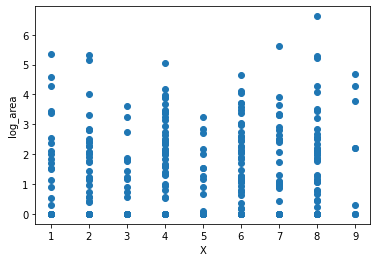

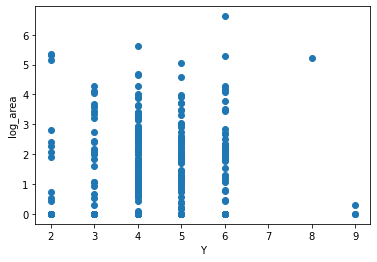

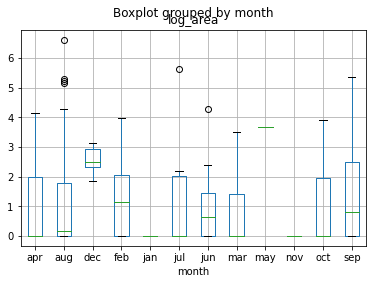

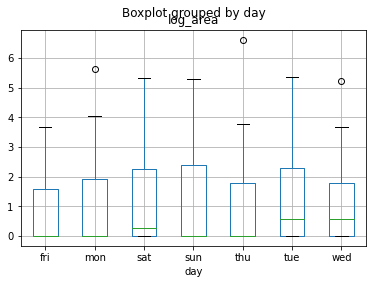

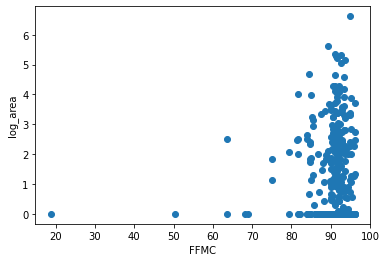

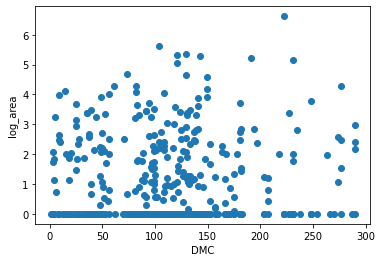

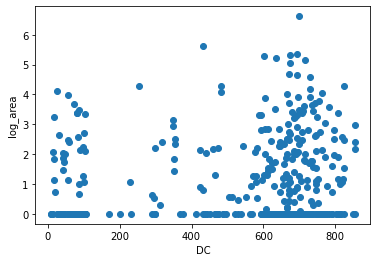

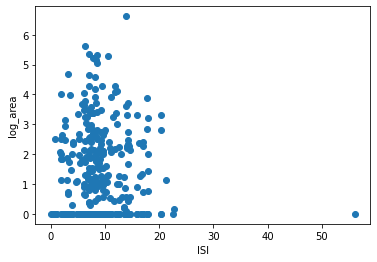

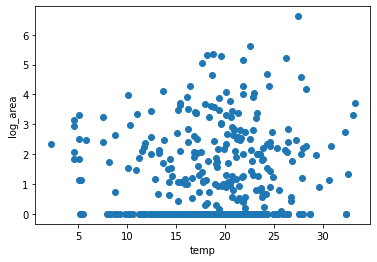

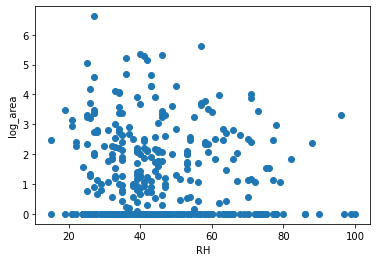

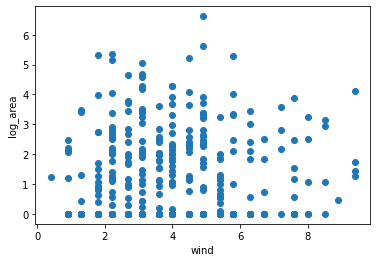

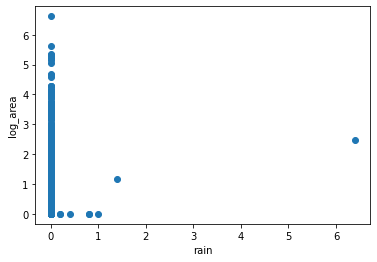

In [23]:
eda["log_area"] = np.log(eda["area"] + 1)
df = eda.drop(columns = "area")
#look at scatter plots after y transformation
prt(df, "log_area", save = True, path = "Images/EDA")

<AxesSubplot:>

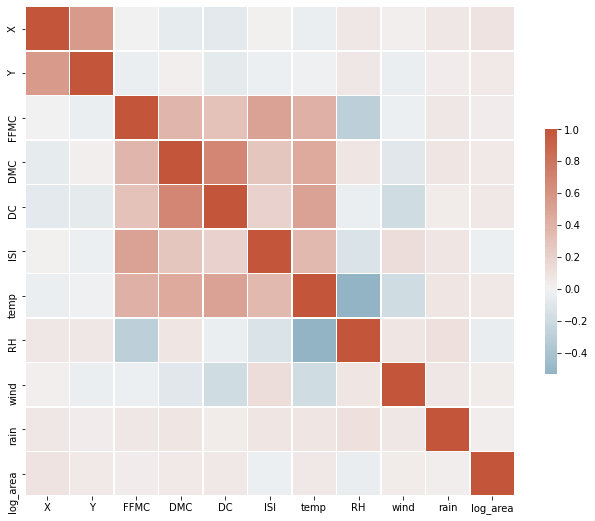

In [24]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP.png")

In [29]:
#fire.month.unique()
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_val = {mon: round(np.sin(2*months.index(mon)*np.pi/12),2) for mon in months}

def get_val(s):
    return month_val[s]

def is_weekend(d):
    if d in ['fri', 'sat', 'sun']:
        return 1
    else:
        return 0

fire_tr = df
fire_tr["Month_Cycle_Score"] = fire_tr['month'].apply(get_val)
fire_tr["Weekend"] = fire_tr['day'].apply(is_weekend)

X_mw = fire_tr.drop(columns = ['month', 'day'])


y_mw = fire_tr["log_area"]

X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Month_Cycle_Score,Weekend
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.87,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,-1.00,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,-1.00,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.87,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.87,1


<AxesSubplot:>

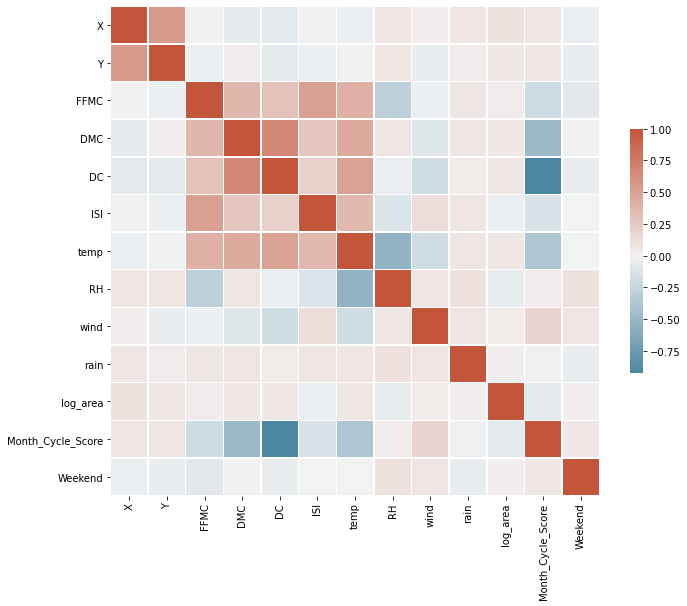

In [30]:
corr = X_mw.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP_transformed_month.png")

Since my defined month variable did not turn out to be correlated with the area burnt and neither did my weekend variable, I will revert back to the data frame 'df' to perform the variable selection.

For Feature Selection, I am using the fit_linear_reg() function as found <a href = "https://colab.research.google.com/drive/1acRIrPQpa_6IHkIlNkGJzsIlxz-ibY0M?usp=sharing#scrollTo=CV-vud5Cpg_r">here</a>

In [34]:
eda.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0.385262
360,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09,0.737164
221,3,4,sep,fri,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88,3.607669
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,4.129229
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38,1.853168


In [35]:
# Get Dummy variables
df = pd.get_dummies(eda, prefix=['month', 'day'])
data = df.drop(columns = ["area", "log_area"])
data.shape


(413, 29)

In [36]:
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,1,0,1,0,0,0,0,0
360,6,5,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,...,0,0,1,1,0,0,0,0,0,0
221,3,4,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,...,0,0,1,1,0,0,0,0,0,0
469,6,3,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,...,0,0,0,0,0,0,1,0,0,0
275,4,6,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
y_fs = df.log_area
X_fs = data

fs = feature_selection(X_fs, y_fs)

# My fs object returns the DataFrame. 
# The object can then be put directly into the plot_feature_selection_criterion() function along with the 
# predictor DataFrame and the y values.

fs.head()

,features,RSS,R_squared,numb_features
1,[month_dec],819.036818,0.012631,1
2,"[month_dec, month_sep]",809.786096,0.023783,2
3,"[month_dec, month_sep, X]",801.005895,0.034368,3
4,"[month_dec, month_sep, X, month_may]",793.444933,0.043483,4
5,"[month_dec, month_sep, X, month_may, day_fri]",785.913627,0.052562,5


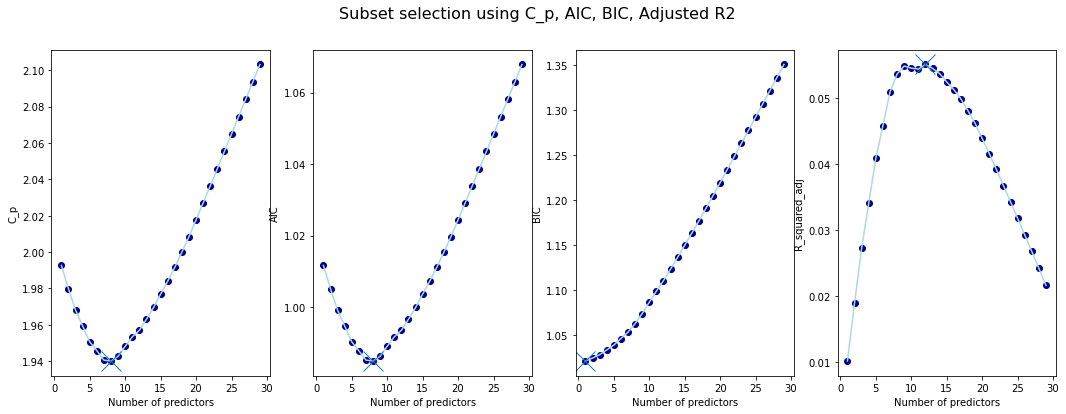

<Figure size 432x288 with 0 Axes>

In [92]:
plot_feature_selection_criterion(fs, X_fs, y_fs)
#plt.savefig("Images/EDA/feature_selection.png")

In [40]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']

for v in (variables):
    if v == "R_squared_adj":
        model = fs[fs[v] == fs[v].max()]["features"] 
    else:  
        model = fs[fs[v] == fs[v].min()]["features"] 
    print(f"Criteria: {v} Model Predictors: {list(model)[0]}\n")

Criteria: C_p Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind']

Criteria: AIC Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind']

Criteria: BIC Model Predictors: ['month_dec']

Criteria: R_squared_adj Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind', 'DMC', 'day_sat', 'day_sun', 'day_tue']



In [77]:
model_predictors = data[list(fs[fs["R_squared_adj"] == fs["R_squared_adj"].max()]["features"])[0]]
model_predictors.head()

,month_dec,month_sep,X,month_may,day_fri,temp,month_feb,wind,DMC,day_sat,day_sun,day_tue
140,0,1,2,0,0,21.9,0,1.8,126.5,0,0,0
360,0,1,6,0,1,18.4,0,2.2,122.0,0,0,0
221,0,1,3,0,1,18.6,0,3.6,141.2,0,0,0
469,0,0,6,0,0,13.7,0,9.4,14.6,0,1,0
275,1,0,4,0,0,5.1,0,4.9,26.4,0,0,0


In [103]:
lr_model = linear_model.LinearRegression(fit_intercept = True)
lr_model.fit(model_predictors, y_fs)

eda_test = pd.get_dummies(X_test, ["month", "day"])[list(fs[fs["R_squared_adj"] == fs["R_squared_adj"].max()]["features"])[0]]
y_log_test = np.log(y_test)

#Training Model
RSS_train = MSE(y_fs,lr_model.predict(model_predictors)) * len(y_fs)
R_squared_train = lr_model.score(model_predictors,y_fs)

#Testing Model
RSS = MSE(y_log_test,lr_model.predict(eda_test)) * len(y_log_test)
R_squared = lr_model.score(eda_test,y_log_test)


print(f"Linear Model using R^2 criteria to choose predictors (Training Set)\nRSS:            {RSS_train}\nAdjusted R^2:   {R_squared_train}")
print("___________________________________________________________")
print(f"Linear Model using R^2 criteria to choose predictors (Test Set)\nRSS:            {RSS}\nAdjusted R^2:   {R_squared}")

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 12)

In [79]:
#Note that AIC and C_p chose the same set of predictors
model_predictors = data[list(fs[fs["C_p"] == fs["C_p"].min()]["features"])[0]]

lr_model = linear_model.LinearRegression(fit_intercept = True)
lr_model.fit(model_predictors, y_fs)

RSS = MSE(y_fs,lr_model.predict(model_predictors)) * len(y_fs)
R_squared = lr_model.score(model_predictors,y_fs)

print(f"Linear Model using C_p/AIC criteria to choose predictors\nRSS:            {RSS}\nAdjusted R^2:   {R_squared}")

Linear Model using C_p/AIC criteria to choose predictors
RSS:            769.7558142544307
Adjusted R^2:   0.07204070589496181


In [90]:
model_predictors = pd.DataFrame(data['month_dec'])

lr_model = linear_model.LinearRegression(fit_intercept = True)
lr_model.fit(model_predictors, y_fs)

RSS = MSE(y_fs,lr_model.predict(model_predictors)) * len(y_fs)
R_squared = lr_model.score(model_predictors,y_fs)

print(f"Linear Model using C_p/AIC criteria to choose predictors\nRSS:            {RSS}\nAdjusted R^2:   {R_squared}")

Linear Model using C_p/AIC criteria to choose predictors
RSS:            819.036818236672
Adjusted R^2:   0.012631260949824141


In [104]:
lr_model.predict(eda_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 12)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 12)

<div style = "background-color: black; height: 80px;">
    <p>asdf</p>
</div>

In [ ]:
#################################################################

In [34]:
#Deep learning Start

In [35]:
#Scale data
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [135]:
#plt.figure()
#plt.scatter(X_testscaled.wind, y)



(12, 413)



---------------------------------------
---------------------------------------
Model: relu 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 2.43
Relative MSE: 219.82% of mean response.
R^2 Score: -0.41
Explained Variace: -0.4
Mean Absolute Error: 1.17
---------------------------------------
---------------------------------------




---------------------------------------
---------------------------------------
Model: logistic 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 1.73
Relative MSE: 156.22% of mean response.
R^2 Score: -0.0
Explained Variace: -0.0
Mean Absolute Error: 1.03
---------------------------------------
---------------------------------------




---------------------------------------
---------------------------------------
Model: tanh 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 1.68
Relative MSE: 151.79% of mean response.
R^2 Score: 0.03
Explained Variace: 0.03
Mean Absolute Error: 1.01
---------------------------------

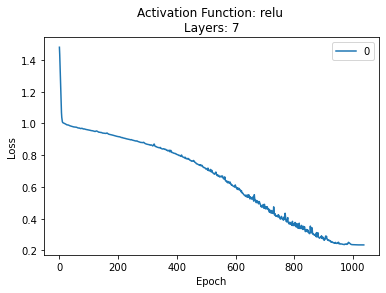

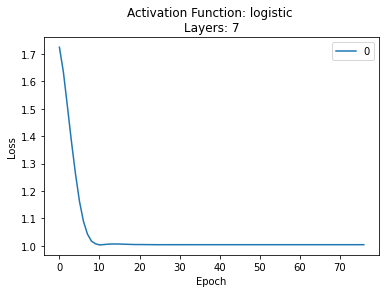

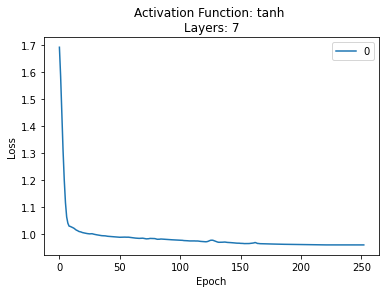

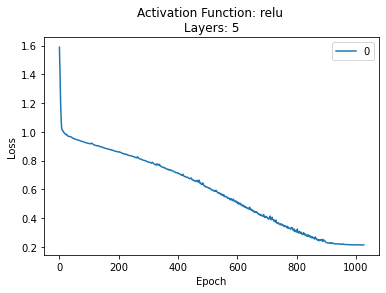

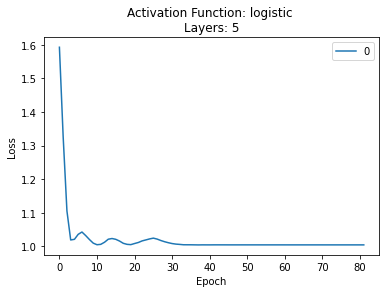

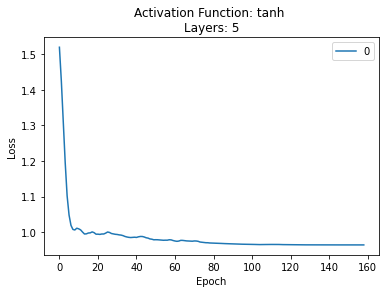

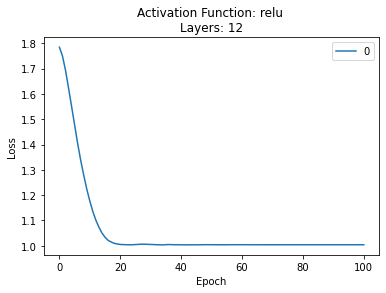

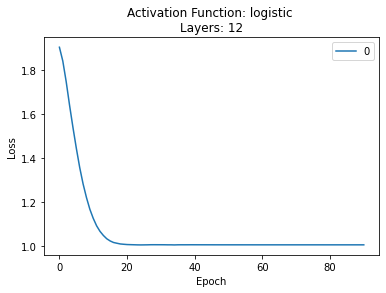

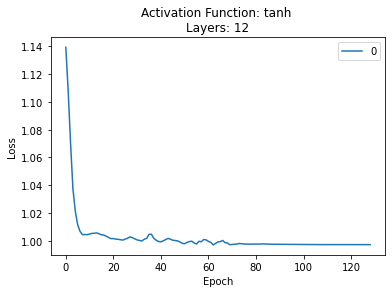

In [51]:
sizes = [(25,25,25,25,25), (100,100,100), (10,10,10,10,10,10,10,10,10,10)]

#sizes = [tuple(12 for i in range(100)), tuple(12 for i in range(20))]
for s in sizes:
    r1 = MLPRegressor(hidden_layer_sizes=s,activation="relu" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_r = r1.fit(X_trainscaled, y_train)
    
    r2 = MLPRegressor(hidden_layer_sizes=s,activation="logistic" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_s = r2.fit(X_trainscaled, y_train)
    
    r3 = MLPRegressor(hidden_layer_sizes=s,activation="tanh" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_t = r3.fit(X_trainscaled, y_train)
    
    
    reg = [reg_r, reg_s, reg_t]
    #print(r1.score)
    for r in reg:
        rep(r, X_testscaled, y_test, s)


In [31]:
from pyearth import Earth

ModuleNotFoundError: No module named 'pyearth'

In [9]:
#MARS Models
model = Earth()
model.fit(X_trainscaled,y_train)
print(model.trace())
print(model.summary())

NameError: name 'Earth' is not defined

In [33]:
len(r.loss_curve_)

len(y_test)

104



---------------------------------------
---------------------------------------
Model: tanh 
Layers: 102 
Size: (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)
Mean Response: 1
MSE: 1.73
Relative MSE: 156.89% of mean response.
R^2 Score: -0.0
Explained Variace: -0.0
Mean Absolute Error: 1.01
---------------------------------------
---------------------------------------




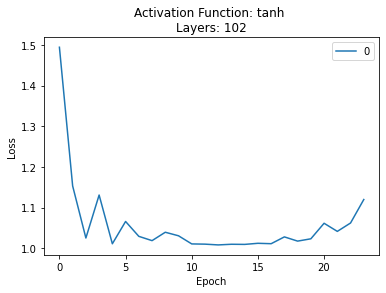

In [73]:
s = tuple(100 for i in range(100))
r2 = MLPRegressor(hidden_layer_sizes = s, activation = "tanh", max_iter=2000).fit(X_trainscaled, y_train)

rep(r2, X_testscaled, y_test, s)

In [179]:
#dir(r2)
#r2.activation

In [72]:
y_pred2=r2.predict(X_testscaled)
np.min(y_pred2)

1.6230199645019563

In [84]:
r2.n_features_in_

12

In [90]:
len(y_test)

104